## Introduction

[Link to Star Classification Dataset](https://www.kaggle.com/deepu1109/star-dataset)


### We'll be analyzing the following star dataset to eventually predict and classify new data points using Neural Networks!

"The ***Hertzsprung-Russell diagram*** (HR diagram) is one of the most important tools in the study of stellar evolution. Developed independently in the early 1900s by Ejnar Hertzsprung and Henry Norris Russell, it plots the temperature of stars against their luminosity (the theoretical HR diagram), or the colour of stars (or spectral type) against their absolute magnitude (the observational HR diagram, also known as a colour-magnitude diagram).
Depending on its initial mass, every star goes through specific evolutionary stages dictated by its internal structure and how it produces energy. Each of these stages corresponds to a change in the temperature and luminosity of the star, which can be seen to move to different regions on the HR diagram as it evolves. This reveals the true power of the HR diagram – astronomers can know a star’s internal structure and evolutionary stage simply by determining its position in the diagram." - COSMOS: The SAO Encyclopedia of Astronomy

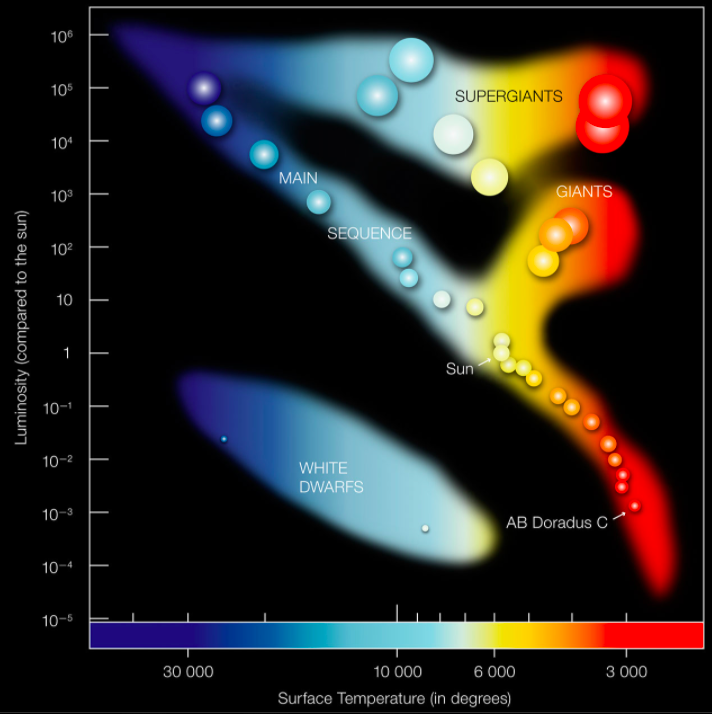


We will be exploring several features of stars:

*   Absolute Temperature `(in K)`
*   Relative Luminosity `(L/Lo)`
*   Relative Radius `(R/Ro)`
*   Absolute Magnitude `(Mv)`
*   Star Color `(white,Red,Blue,Yellow,yellow-orange etc)`
*   Spectral Class `(O, B, A, F, G, K, M)`
*   Star Type `(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence, SuperGiants, HyperGiants)`

```
Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)

Ro = 6.9551 x 10^8 m (Avg Radius of Sun)
```









[General Overview of Standards for Star Classification](https://www.enchantedlearning.com/subjects/astronomy/stars/startypes.shtml)

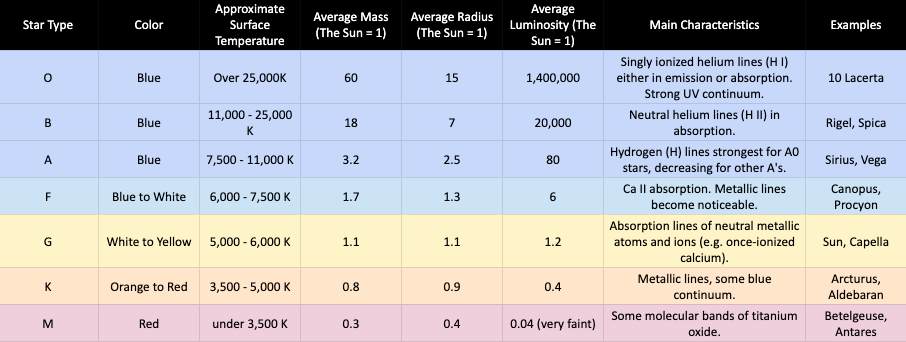



## Pre-processing the Data

Feature engineering can be used to help make the data more uniform and usable. 


[Link to dataset in Google Spreadsheet](https://docs.google.com/spreadsheets/d/1ESVMiXWXlaqUpLvvfXTRpWeOa2fVgnYm7HUYUcuRGgw/edit?usp=sharing)

In [ ]:
# Import the necessary packages/libraries
import pandas as pd
import numpy as np

# Connecting your google drive with colab to access data from spreadsheets
# You will need to run this code and enter a key to authenticate every day/session
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

# Loading the star classification data set from google drive
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1ESVMiXWXlaqUpLvvfXTRpWeOa2fVgnYm7HUYUcuRGgw/edit#gid=143999280')
sheet = wb.worksheet('stars')
data = sheet.get_all_values()

# Assigning the star classification data set to a dataframe
df = pd.DataFrame(data)

# Set the headings
df.columns = df.iloc[0]
df = df.iloc[1:]

### Viewing the Data

In [ ]:
# View the first five rows of the dataframe
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
1,3068,0.0024,0.17,16.12,0,Red,M
2,3042,0.0005,0.1542,16.6,0,Red,M
3,2600,0.0003,0.102,18.7,0,Red,M
4,2800,0.0002,0.16,16.65,0,Red,M
5,1939,0.000138,0.103,20.06,0,Red,M


In [ ]:
# Check the data types
df.dtypes

0
Temperature (K)           object
Luminosity(L/Lo)          object
Radius(R/Ro)              object
Absolute magnitude(Mv)    object
Star type                 object
Star color                object
Spectral Class            object
dtype: object

As we can see, each of the labels are classified as "objects". Let's specify the corresponding data types they contain. 

In [ ]:
# creating a dictionary for the star classification data to set each column to the data type it should be

stars_df = {
    'Temperature': df['Temperature (K)'].astype(float),
    'Luminosity': df['Luminosity(L/Lo)'].astype(float),
    'Radius': df['Radius(R/Ro)'].astype(float),
    'Magnitude': df['Absolute magnitude(Mv)'].astype(float),
    'Star_type': df['Star type'].astype(int),
    'Star_color': df['Star color'].astype(str),
    'Spectral_Class': df['Spectral Class'].astype(str),
}

Let's see the new data types. 

In [ ]:
df = pd.DataFrame(stars_df)
df.dtypes

Temperature       float64
Luminosity        float64
Radius            float64
Magnitude         float64
Star_type           int64
Star_color         object
Spectral_Class     object
dtype: object

### Dealing With Outliers

When dealing with outliers, there are two main methods. 

Method 1: Drop specific rows that are extreme outliers based on visual representations

Method 2: Drop any rows that fall some number of [standard deviations](https://www.mathsisfun.com/data/standard-deviation.html) away from a column's mean value

In [ ]:
# We will use Method 1
# Drop any rows where the radius is over 3000 

df = df.drop(df[df.Radius > 500].index) #uncommenting this changes the max from 1948 to 98

# Let's check by using describe to find the max
df['Radius'].describe()

count    200.000000
mean      11.209838
std       23.558904
min        0.008400
25%        0.093150
50%        0.338000
75%        6.367500
max       98.000000
Name: Radius, dtype: float64

### One-hot Encoding 

This is another very common method when preparing data for machine learning. We can re-arrange the data so the unique values each get a column and within the column there are 0s and 1s. A value of 1 means that something is present in that row, while a value of zero means it is not present.

It's primarily if you want to combine certain columns, or if you have certain features that are string values (for further processing we need all numerical values). 

We can use dummy variables to represent the different star types (O, B, A, F, G, K, M).

In [ ]:
startypes = pd.get_dummies(stars_df['Star_color'])
startypes

,Blue,Blue White,Blue white,Blue-White,Blue-white,Orange,Orange-Red,Pale yellow orange,Red,White,White-Yellow,Whitish,Yellowish,Yellowish White,white,yellow-white,yellowish
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
237,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
238,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
239,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Then we merge the two dataframes together
# This way, we get to keep the original column to check our work
stars_df = pd.concat([df, startypes],axis=1)
stars_df.head()

,Temperature,Luminosity,Radius,Magnitude,Star_type,Star_color,Spectral_Class,Blue,Blue White,Blue white,Blue-White,Blue-white,Orange,Orange-Red,Pale yellow orange,Red,White,White-Yellow,Whitish,Yellowish,Yellowish White,white,yellow-white,yellowish
1,3068.0,0.002400,0.1700,16.12,0.0,Red,M,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3042.0,0.000500,0.1542,16.60,0.0,Red,M,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2600.0,0.000300,0.1020,18.70,0.0,Red,M,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2800.0,0.000200,0.1600,16.65,0.0,Red,M,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,1939.0,0.000138,0.1030,20.06,0.0,Red,M,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


Now we have been able to merge both dataframes together! There is a separate column for each of the different star types.
  
`Note: If the given star is of that type it will be labeled as 1, if not then it will be 0`

### Binning

One more feature we'll add now is binning. We can create some bins/buckets for each of the different star colors.

In [ ]:
# we use qcut to make sure the bins are close to even sizes
# The cuts between bins are based on quantiles

# We can make these numbers or text. 
# Blue: 1
# Blue White: 2
# Blue - White: 3
# Orange: 4
# Orange - Red: 5
# Pale yellow Orange: 6
# Red: 7
# White: 8
# White - Yellow: 9
# Whitish: 10
# Yellowish: 11
# Yellowish White: 12
# white: 13
# yellow - white: 14

type_labels = [1,2,3,4,5]

stars_df['StarType_Bin'] = pd.qcut(stars_df['Star_type'],q=5,labels=type_labels)

# # # View the bins and how many data points are in each bin
pd.value_counts(stars_df['StarType_Bin'])

5    40
4    40
3    40
2    40
1    40
Name: StarType_Bin, dtype: int64

In [ ]:
# check our work again, make sure the high ratings correspond to bin 3, etc.
stars_df.head()

,Temperature,Luminosity,Radius,Magnitude,Star_type,Star_color,Spectral_Class,Blue,Blue White,Blue white,Blue-White,Blue-white,Orange,Orange-Red,Pale yellow orange,Red,White,White-Yellow,Whitish,Yellowish,Yellowish White,white,yellow-white,yellowish,StarType_Bin
1,3068.0,0.002400,0.1700,16.12,0.0,Red,M,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,3042.0,0.000500,0.1542,16.60,0.0,Red,M,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,2600.0,0.000300,0.1020,18.70,0.0,Red,M,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,2800.0,0.000200,0.1600,16.65,0.0,Red,M,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
5,1939.0,0.000138,0.1030,20.06,0.0,Red,M,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


## Visualization with K-Means


First, we have to figure out what the best amount of clusters is. Since we need to define the number of clusters in K-Means, we will use a for loop so we can test multiple values for cluster #s at one time. This way we can evaluate which # of clusters is better more easily.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#First off, what features (or labels) are we using in our clustering?
cluster_data = df[['Radius','Temperature']]

# We also need to define the number of clusters our algorithm should test for
range_n_clusters = [2,3,4,5,6,7,8,9]

# Use a for loop to test all the different numbers of clusters in range_n_clusters
# This way we can compare how good different numbers of clusters are, quickly!

for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(cluster_data)
  silhouette_avg = silhouette_score(cluster_data, cluster_labels)
  print("For n_clusters = ", n_clusters,
        "The average silhouette coefficient is:", silhouette_avg)
    # Each cluster number will produce a silhouette coefficient. Higher values are usually better.

For n_clusters =  2 The average silhouette coefficient is: 0.692377473162249
For n_clusters =  3 The average silhouette coefficient is: 0.6782992239225811
For n_clusters =  4 The average silhouette coefficient is: 0.7034147097677963
For n_clusters =  5 The average silhouette coefficient is: 0.7037591698251227
For n_clusters =  6 The average silhouette coefficient is: 0.7201224864815597
For n_clusters =  7 The average silhouette coefficient is: 0.7212105728793256
For n_clusters =  8 The average silhouette coefficient is: 0.6996356490431423
For n_clusters =  9 The average silhouette coefficient is: 0.6899730507777985


A silhouette coefficient is being used to decide on the best number of clusters.

The `silhouette value` for each point is a measure of how similar that point is to other points in the cluster and how different it is from the other clusters. When the values for each point are combined, we get a silhouette coefficient (or score).

*In this example, 6-7 clusters seems to be the best. This is very similar to how stars are already classfied! (in 6 categories)*


---



Now let's make a graph to visualize these "clusters" a bit better using MatLab!

In [ ]:
# k means
kmeans = KMeans(n_clusters=6, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Radius', 'Temperature']])

# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3], 4:cen_x[4], 5:cen_x[5]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3], 4:cen_y[4], 5:cen_y[5]})

# define and map colors (dark blue, medium blue, light blue, yellow, orange, red - corresponding to different star colors)
colors = ['#FFA500', '#8CAABE', '#FF3232', '#407294', '#E8EEF2', '#FFFF7F']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5]})

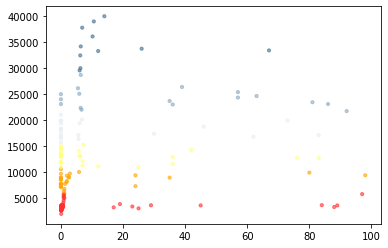

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df.Radius, df.Temperature, c=df.c, alpha = 0.6, s=10)

In this graph, the "Radius" is the x-axis, and the corresponding "Temperature" is the y-axis. 

As we can see, the clusters are colored similar to the temperature of stars! **The closer to blue, the hotter!**


---
Now, let's try to add and visualize another feature, the Luminosity


In [ ]:
#again we have to remove the outliers in our data so it is more practical and focused (we can see trends better)

# Drop any rows where the luminosity is over 0.002

df = df.drop(df[df.Luminosity > 0.002].index) 

# Let's check again by using describe to find the max
df['Luminosity'].describe()


count    91.000000
mean      0.000695
std       0.000442
min       0.000080
25%       0.000310
50%       0.000640
75%       0.000980
max       0.001800
Name: Luminosity, dtype: float64

In [ ]:
cluster_data = df[['Temperature','Luminosity']]

# We also need to define the number of clusters our algorithm should test for
range_n_clusters = [2,3,4,5,6,7,8,9]

# Use a for loop to test all the different numbers of clusters in range_n_clusters
# This way we can compare how good different numbers of clusters are, quickly!

for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(cluster_data)
  silhouette_avg = silhouette_score(cluster_data, cluster_labels)
  print("For n_clusters = ", n_clusters,
        "The average silhouette coefficient is:", silhouette_avg)
    # Each cluster number will produce a silhouette coefficient. Higher values are usually better.

For n_clusters =  2 The average silhouette coefficient is: 0.7610179048955504
For n_clusters =  3 The average silhouette coefficient is: 0.7535928004219491
For n_clusters =  4 The average silhouette coefficient is: 0.7975558420262031
For n_clusters =  5 The average silhouette coefficient is: 0.7908650389889629
For n_clusters =  6 The average silhouette coefficient is: 0.7780547451772992
For n_clusters =  7 The average silhouette coefficient is: 0.785494384533869
For n_clusters =  8 The average silhouette coefficient is: 0.7938514223443732
For n_clusters =  9 The average silhouette coefficient is: 0.7886997504996528


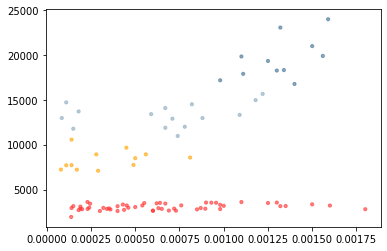

In [ ]:
# k means (notice how 4 clusters provided the best result above)
kmeans = KMeans(n_clusters=4, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Luminosity', 'Temperature']])

# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3]})

# define and map colors (dark blue, light blue, yellow, red - corresponding to different star colors)
colors = ['#FF3232', '#8CAABE', '#407294', '#FFA500']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})

plt.scatter(df.Luminosity, df.Temperature, c=df.c, alpha = 0.6, s=10)

We did a very similar thing to "Radius vs. Temperature". 
1.  Optimized the data to focus on a specific section.
2.  Found the best number of clusters to categorize using silhouette.
3.  Made a visual representation (scatterplot) of each cluster. 

**The hotter a star gets (the more blue), the more likely it is to have a higher luminosity (brightness, or the rate of emission of radiation).**


### Let's Combine Features! (3D Plots)

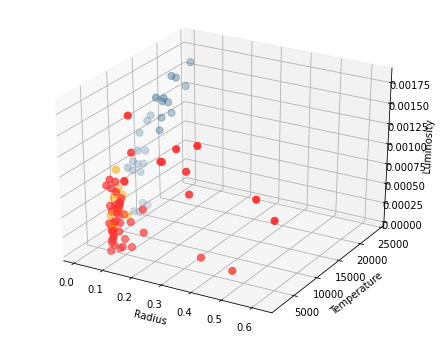

In [ ]:
from mpl_toolkits import mplot3d

colors = ['#FF3232', '#8CAABE', '#407294', '#FFA500']

kmeans = KMeans(n_clusters=4, random_state=0)

df['cluster'] = kmeans.fit_predict(df[['Radius', 'Temperature', 'Luminosity']])
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})

fig = plt.figure(figsize=(26,6))

ax = fig.add_subplot(131, projection='3d')
ax.scatter(df.Radius, df.Temperature, df.Luminosity, c=df.c, s=50)

ax.set_xlabel('Radius')
ax.set_ylabel('Temperature')
ax.set_zlabel('Luminosity')

plt.show()

**Overall Trends**
*   As radius increases, the color of the star is more likely to be red, have a lower temperature, and a lower luminosity. 
*   As radius decreases, the color of the star is more likely to be blue, have a higher temperature, and a higher luminosity. 
*   Blue stars (ex. white dwarfs) tend to be smaller in size, have higher temperatures, and as a result, higher luminosities. 
*   Red stars (ex. supergiants) tend to be larger in size, however, have lower temperatues, and lower lumniosities. 


## Which Algorithm is the Best?

Let's try some classification on the data! It'll be a competition to see which algorithm is the most efficient on the star data.

The first thing we need to do is split our data into a training set and a test set. We'll use the training set to develop our model, then use the test set to see how well our model performs on other data.

In [ ]:
#make sure we don't have any missing data, and if so fill it 
stars_df.isnull().any()
stars_df = stars_df.fillna(method='ffill')

In [ ]:
#import required libraries
from scipy import stats
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
df = df.reset_index()

In [ ]:
# Now we'll define the inputs to our machine learning model from the rest of our dataframe. 
# We should NOT use "Star_color" or "Startype" because this is the information we are trying to predict

x = stars_df[['Radius','Luminosity','Temperature']]

# Define the targets - what we are trying to predict or classify
# Here we will try to predict which category a star falls into (with a 1 or 0)

y = stars_df[['StarType_Bin']]

In [ ]:
# We'll save 20 percent of our data for testing and use 80 percent for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# This is where we set our machine learning algorithm type - Naive Bayes
model = GaussianNB()

# Fit the model with our training data
model.fit(x_train,y_train)

# Use the model to make predictions using our testing input data
y_pred = model.predict(x_test)

# Calculate the accuracy of the model as a percent
accuracy = accuracy_score(y_test,y_pred)*100
accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


87.5

SVM (Support Vector Machine)

In [ ]:
# Import necessary package
from sklearn import svm

# Set input data (x) and target for prediction (y)
x = stars_df[['Radius','Luminosity','Temperature','Magnitude']]
y = stars_df[['StarType_Bin']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# This is where we set our machine learning algorithm type - SVM
model = svm.LinearSVC()
model.fit(x_train,y_train)

# Use the model to make predictions using our testing input data
y_pred = model.predict(x_test)

# Calculate the accuracy of the model as a percent
accuracy = accuracy_score(y_test,y_pred)*100
accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


45.83333333333333

Decision Tree Classifier

In [ ]:
# Import necessary package
from sklearn.tree import DecisionTreeClassifier

# Set input data (x) and target for prediction (y)
x = stars_df[['Radius','Luminosity','Temperature','Magnitude']]
y = stars_df[['StarType_Bin']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# This is where we set our machine learning algorithm type - Decision Tree
model = DecisionTreeClassifier(criterion='entropy',random_state=0) 
model.fit(x_train,y_train)

# Use the model to make predictions using our testing input data
y_pred = model.predict(x_test)

# Calculate the accuracy of the model as a percent
accuracy = accuracy_score(y_test,y_pred)*100
accuracy

100.0

MLP Classifier (Neural Network)

In [ ]:
# Import necessary package
from sklearn.neural_network import MLPClassifier

# Set input data (x) and target for prediction (y)
x = stars_df[['Radius','Luminosity','Temperature','Magnitude']]
y = stars_df[['StarType_Bin']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# This is where we set our machine learning algorithm type - Neural Network
model = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
model.fit(x_train,y_train)

# Use the model to make predictions using our testing input data
y_pred = model.predict(x_test)

# Calculate the accuracy of the model as a percent
accuracy = accuracy_score(y_test,y_pred)*100
accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


18.75

We can see that out of all 4 types of models, the decision tree classifier worked the best on the data. However, this might not be so good...

It's correlation rate is 100%, which may be a sign of overfitting. In this case, the model memorizes and knows all the work-arounds of the training dataset. However, it will be too fixated on trends exclusive to the training set; when presented with new data, it will not perform as well. 